# Single label multiclass -  Image Classification - Flowers Recognition - CNN

- Dataset Description
  - This dataset contains 4242 images of flowers
  - The data collection is based on the data flicr, google images, yandex images
  - You can use this datastet to recognize plants from the photo.
- Data
  - https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing
- Attribute Information
  - The pictures are divided into five classes
    - chamomile
    - tulip
    - rose
    - sunflower
    - dandelion
  - For each class there are about 800 photos. 
  - Photos are not high resolution, about 320x240 pixels
- Also explore how to resize images in tensorflow and then resize all the images to a same size
- This is a Multiclass Classification Problem.<br>

- WORKFLOW
  - Load Data 
  - Split into 60 and 40 ratio.
  - Encode labels.
  - Create Model
  - Compilation Step 
    - Its a Multiclass Classification problem , select loss , metrics according to it
  - Train the Model.
    - If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need
  - Evaluation Step
  - Prediction
    - Prediction should be > 85%

## Solution

In [1]:
# imports
from pathlib import Path
import cv2
import numpy as np
import pandas as pd
# sklearn for data pre-processing
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

### Load Data

In [2]:
# mount google drive so data can be assessed
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# path of folder with datasets
base_path = "/content/drive/MyDrive/DL_datasets/"
# path of folder with dataset of this project
data_path = "Flowers_Recognition/"
# complete path to directory
dir_path = Path(base_path+data_path)

In [4]:
# read images and labels and append into some lists

# define empty list
labels = []
features = []

# loop over directories in the parent folder
for dir in dir_path.iterdir():
  print(dir.name)
  # loop over images in each sub directory
  for imgpath in dir.iterdir():
    # check if the entry is a "jpg" image
    if imgpath.name.endswith("jpg"):
      # read image and change it to grey scale
      imgarr = cv2.imread(str(imgpath))
      # resize all images to (150,150)
      imgarr = cv2.resize(imgarr, (180,180))
      # append data to lists
      labels.append(dir.name)
      features.append(imgarr)

sunflower
tulip
daisy
rose
dandelion


In [5]:
# convert list into an ndarray and check shape
flower_data = np.asarray(features)
print(flower_data.shape)
flower_labels = np.asarray(labels)
print(flower_labels.shape)

(4333, 180, 180, 3)
(4333,)


In [6]:
# shuffle data to remove patterns
flower_data, flower_labels = utils.shuffle(flower_data, flower_labels)

### Encode labels

- now we have features and labels but before splitting it in the train and test first encode labels. So they are in numeric form

In [7]:
print("original labels : ")
print(flower_labels)

# find unique labels and index of their first occurance
temp = {}
original_labels = np.unique(flower_labels)
for i in original_labels:
  temp[np.where(flower_labels == i)[0][0] ] = i

# encode labels to numeric form
labelEncoder = preprocessing.LabelEncoder()
flower_labels = labelEncoder.fit_transform(flower_labels)

print("encoded labels : ")
print(flower_labels)

# a dict of labels and incoded values
original_encoded_labels = {}
for k,v in temp.items():
  original_encoded_labels[flower_labels[k]] = v

# Encoded label and original label
print("Encoded label and original label : ")
print(original_encoded_labels)

original labels : 
['sunflower' 'sunflower' 'daisy' ... 'tulip' 'sunflower' 'tulip']
encoded labels : 
[3 3 0 ... 4 3 4]
Encoded label and original label : 
{0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}


### Split into 60 and 40 ratio.

In [8]:
# split data in 60% training and 40 % testing data
# data seams to be too less so rater than 60/40 split
# split data to 90/10
train_images, test_images, train_labels, test_labels = train_test_split(flower_data, flower_labels, test_size=0.2, random_state=1)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.4, random_state=1)

In [9]:
# training data
print("Shape of training images : ",train_images.shape)
print("Shape of training images labels : ",train_labels.shape)
# testing data
print("Shape of test images : ",test_images.shape)
print("Shape of test images labels : ",test_labels.shape)
# Validation data
print("Shape of val images : ",val_images.shape)
print("Shape of val images labels : ",val_labels.shape)

Shape of training images :  (2079, 180, 180, 3)
Shape of training images labels :  (2079,)
Shape of test images :  (867, 180, 180, 3)
Shape of test images labels :  (867,)
Shape of val images :  (1387, 180, 180, 3)
Shape of val images labels :  (1387,)


Original Label :  sunflower
Encoded Label :  1


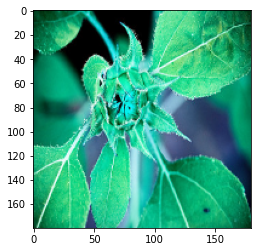



Original Label :  dandelion
Encoded Label :  1


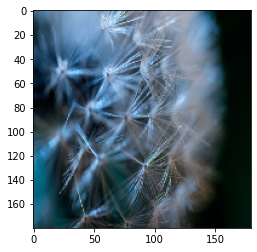

In [11]:
# A little visulization of the data in traiing and test set

# training set
flower = train_images[0]
plt.imshow(flower, cmap=plt.cm.binary)
print("Original Label : ",original_encoded_labels[train_labels[0]])
print("Encoded Label : ",train_labels[5])
plt.show()

print("\n")

# test set
flower = test_images[21]
plt.imshow(flower, cmap=plt.cm.binary)
print("Original Label : ",original_encoded_labels[test_labels[21]])
print("Encoded Label : ",test_labels[21])
plt.show()

- before creating the model we first normlize the data

In [12]:
# Preparing the image data
# Initally values are between interval [0,225]
# scale them to be in interval [0,1]
train_images = train_images.astype("float32") / 255
val_images = val_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

---

### Create Model

In [13]:
# Listing 8.7 Instantiating a small convnet for dogs vs. cats classification
 
# layers

# inputs which are going to be images
# (180,180,3) is the assumed size of the inputs
# need to rescale inputs to said size
inputs = keras.Input(shape=(180, 180, 3))

# Conv and max poling layers
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# flatten the inputs as next we are using dense layer
x = layers.Flatten()(x)
# sigmoid activation as the binary classification problem
outputs = layers.Dense(5, activation="softmax")(x)

# model defination
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856 

### Compilation Step
- Multiclass Classification problem
  - select loss , metrics according to it

In [15]:
model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

### Train the Model.
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need

In [16]:
# Listing 8.11 Fitting the model using a Dataset
callbacks = [
  keras.callbacks.ModelCheckpoint(
  filepath="flowers.keras",
  save_best_only=True,
  monitor="val_loss")
]

history = model.fit(
    train_images, 
    train_labels,
    validation_data=(val_images, val_labels),
    epochs=30,
    batch_size=20,
    callbacks=callbacks)

Epoch 1/30
104/104 [==============================] - 17s 46ms/step - loss: 1.4788 - accuracy: 0.3718 - val_loss: 1.3282 - val_accuracy: 0.4232
Epoch 2/30
104/104 [==============================] - 4s 34ms/step - loss: 1.2312 - accuracy: 0.4772 - val_loss: 1.2552 - val_accuracy: 0.4636
Epoch 3/30
104/104 [==============================] - 4s 34ms/step - loss: 1.1153 - accuracy: 0.5565 - val_loss: 1.1708 - val_accuracy: 0.5105
Epoch 4/30
104/104 [==============================] - 4s 34ms/step - loss: 0.9786 - accuracy: 0.6282 - val_loss: 0.8950 - val_accuracy: 0.6583
Epoch 5/30
104/104 [==============================] - 4s 34ms/step - loss: 0.9137 - accuracy: 0.6614 - val_loss: 1.0482 - val_accuracy: 0.6366
Epoch 6/30
104/104 [==============================] - 4s 35ms/step - loss: 0.8050 - accuracy: 0.7119 - val_loss: 0.8682 - val_accuracy: 0.6633
Epoch 7/30
104/104 [==============================] - 4s 35ms/step - loss: 0.7167 - accuracy: 0.7398 - val_loss: 0.9653 - val_accuracy: 0.668

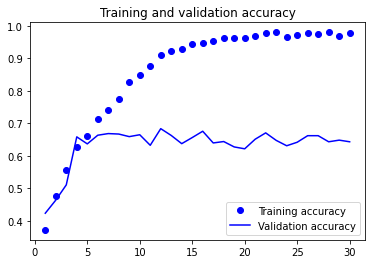

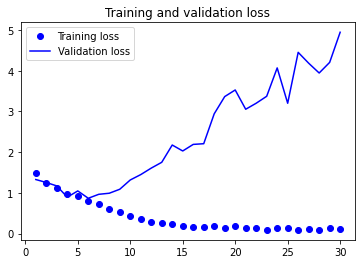

In [17]:
# Listing 8.12 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [18]:
# load model, saved before overfitting started
test_model = keras.models.load_model("flowers.keras")
test_loss, test_acc = test_model.evaluate(test_images,test_labels) 
print(f"Test accuracy: {test_acc:.3f}")

28/28 [==============================] - 1s 24ms/step - loss: 0.8324 - accuracy: 0.7013
Test accuracy: 0.701
